In [1]:
import pandas as pd, numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tools import networkHelpers as nh 

import dev_hiveplot.hiveplot as hp
from copy import copy
from importlib import reload

%matplotlib inline

## Read in HGNC Mapper

In [2]:
hgnc = lh.fetch_hgnc_mapper()

,HGNC ID,Approved symbol,Approved name,Status,Previous symbols,Synonyms,Chromosome,Accession numbers,RefSeq IDs,NCBI Gene ID(supplied by NCBI),Ensembl ID(supplied by Ensembl),Rat genome database ID(supplied by RGD),Vega ID(supplied by Vega),OMIM ID(supplied by OMIM),RefSeq(supplied by NCBI),UCSC ID(supplied by UCSC),UniProt ID(supplied by UniProt),Mouse genome database ID(supplied by MGI),Name synonyms
0,HGNC:5,A1BG,alpha-1-B glycoprotein,Approved,NaN,NaN,19q13.43,NaN,NM_130786,1.0,ENSG00000121410,RGD:69417,OTTHUMG00000183507,138670,NM_130786,uc002qsd.5,P04217,MGI:2152878,NaN
1,HGNC:37133,A1BG-AS1,A1BG antisense RNA 1,Approved,"NCRNA00181, A1BGAS, A1BG-AS",FLJ23569,19q13.43,BC040926,NR_015380,503538.0,ENSG00000268895,NaN,OTTHUMG00000183508,NaN,NR_015380,uc002qse.3,NaN,NaN,NaN
2,HGNC:24086,A1CF,APOBEC1 complementation factor,Approved,NaN,"ACF, ASP, ACF64, ACF65, APOBEC1CF",10q11.23,AF271790,NM_014576,29974.0,ENSG00000148584,RGD:619834,OTTHUMG00000018240,618199,NM_001198818,uc057tgv.1,Q9NQ94,MGI:1917115,NaN
3,HGNC:6,A1S9T~withdrawn,"symbol withdrawn, see UBA1",Symbol Withdrawn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HGNC:7,A2M,alpha-2-macroglobulin,Approved,NaN,"FWP007, S863-7, CPAMD5",12p13.31,"BX647329, X68728, M11313",NM_000014,2.0,ENSG00000175899,RGD:2004,OTTHUMG00000150267,103950,NM_000014,uc001qvk.2,P01023,MGI:2449119,NaN


## Create Louvain clusters

In [10]:
louvain_sub = pd.read_csv('../results/weighted/louvain_small_clusters.txt', sep='\t')
louvain_super = pd.read_csv('../results/weighted/louvain_clusters.txt', sep='\t')
louv= louvain_super.merge(louvain_sub.set_index('names'), how='left', on='names', suffixes=['_super', '_sub'])
louv.head()

,names,cluster_super,cluster_sub
0,PAK1,5,3
1,ERBB2,5,18
2,MST1R,5,18
3,YES1,5,18
4,TYRO3,5,18


## Read in the Graph for connectivity

In [11]:
graph_edges = pd.read_csv('../data/kin/kin_anscombe_weighted.csv', sep='\t', header=None)
graph_edges[0] = copy(graph_edges[0].apply(lambda x: hgnc_mapper[x]))
graph_edges[1] = copy(graph_edges[1].apply(lambda x: hgnc_mapper[x]))
graph_edges.head()

,0,1
0,PAK1,ERBB2
1,MST1R,YES1
2,TYRO3,YES1
3,LYN,KIT
4,PRKCA,KIT


In [12]:
graph_edges_duplicate = copy(graph_edges)
graph_edges_duplicate.columns = [1,0]
graph_edges_duplicate = graph_edges_duplicate[[0,1]]

graph_edges_extended= graph_edges.append(graph_edges_duplicate)

In [13]:
graph_edge_dict = graph_edges_extended.groupby(0).agg(lambda x: set(x)).to_dict()[1]
graph_edge_dict.update({x:y|set([x]) for x,y in graph_edge_dict.items()})# make reflexive
graph_edge_dict

{'AATK': {'AATK', 'CDK5', 'STK39'},
 'ABL1': {'ABL1',
  'ABL2',
  'ATM',
  'ATR',
  'BMP2K',
  'BTK',
  'CDK1',
  'CDK5',
  'CDKL5',
  'CLK1',
  'CLK4',
  'EGFR',
  'EPHA1',
  'EPHA3',
  'EPHA4',
  'EPHA5',
  'EPHA7',
  'EPHA8',
  'EPHB2',
  'EPHB3',
  'EPHB6',
  'ERBB2',
  'ERBB3',
  'ERBB4',
  'FYN',
  'HCK',
  'HIPK2',
  'JAK1',
  'JAK2',
  'KIT',
  'LATS2',
  'LRRK1',
  'LRRK2',
  'LYN',
  'MAP3K8',
  'MAP4K1',
  'MAP4K5',
  'MAPK1',
  'MAPK11',
  'MAPK12',
  'MAPK14',
  'MAPK3',
  'MET',
  'MTOR',
  'MYLK',
  'NEK8',
  'NTRK1',
  'NTRK2',
  'NTRK3',
  'PAK2',
  'PDGFRB',
  'PDK1',
  'PKM',
  'PRKCD',
  'PRKCZ',
  'PRKD1',
  'PRKDC',
  'ROS1',
  'SRC',
  'SRPK2',
  'STK3',
  'STK4',
  'SYK',
  'TTK',
  'UHMK1',
  'WNK2',
  'YES1',
  'ZAP70'},
 'ABL2': {'ABL1',
  'ABL2',
  'EGFR',
  'EPHB2',
  'ERBB2',
  'ERBB3',
  'ERBB4',
  'FYN',
  'HCK',
  'JAK1',
  'KIT',
  'LRRK2',
  'MAP3K10',
  'MET',
  'PDGFRB',
  'PKM',
  'SRC'},
 'ACVR1': {'ACVR1',
  'ACVR1B',
  'ACVR1C',
  'ACVR2A',
  'A

## Drug targeting

In [14]:
drug_data = pd.read_excel('../../data/Klaeger_Science_2017 Supplementary Table 6 Selectivities.xlsx', sheet_name='CATDS target')
drug_data.head()

,Drug,Target,At,CATDS
0,MK-5108,AURKA,0.120921,0.657165
1,PF-477736,CHEK1,0.243725,0.733257
2,Dovitinib,FLT3,0.265240,0.860803
3,Silmitasertib,CSNK2A1;CSNK2A3,0.309017,0.508172
4,Capmatinib,MET,0.337514,1.000000


In [15]:
drug_list = list(sorted(set(drug_data.Drug)))
len(drug_list)

222

In [16]:
double_drug_targets = drug_data[drug_data['Target'].apply(lambda x: ';' in x)]
#double_drug_targets.shape

first_genes = double_drug_targets['Target'].apply(lambda x: x.split(';')[0])
second_genes = double_drug_targets['Target'].apply(lambda x: x.split(';')[1])

repaired_double_targets = double_drug_targets.drop('Target', axis=1).assign(**{'Target':first_genes})
repaired_double_targets = repaired_double_targets.append(double_drug_targets.drop('Target', axis=1).assign(**{'Target':second_genes})) 
#repaired_double_targets = repaired_double_targets[cols_to_keep]

drug_data = drug_data.drop(double_drug_targets.index).append(repaired_double_targets)

# filter to only hgnc keys
drug_data = drug_data[drug_data.Target.isin(hgnc_mapper.keys())]

# convert to hgnc
drug_data.Target = drug_data.Target.apply(lambda x: hgnc_mapper[x])

# sort columns
drug_data = drug_data[['Target', 'Drug', 'At', 'CATDS']]
drug_data.head()


/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Target,Drug,At,CATDS
0,AURKA,MK-5108,0.120921,0.657165
1,CHEK1,PF-477736,0.243725,0.733257
2,FLT3,Dovitinib,0.265240,0.860803
4,MET,Capmatinib,0.337514,1.000000
5,MAPKAPK2,VX-702,0.342705,0.743594


In [17]:
# filter to kinases present
drug_data = drug_data[drug_data.Target.isin(set(louv['names']))]

# create dicts to map cluster numbers
gene_to_sub_mapper = louv.set_index('names')['cluster_sub'].to_dict()
gene_to_super_mapper = louv.set_index('names')['cluster_super'].to_dict() 

drug_data['cluster_sub'] = drug_data.Target.apply(lambda x: gene_to_sub_mapper[x])
drug_data['cluster_super'] = drug_data.Target.apply(lambda x: gene_to_super_mapper[x])

drug_data.head()

,Target,Drug,At,CATDS,cluster_sub,cluster_super
0,AURKA,MK-5108,0.120921,0.657165,6,4
1,CHEK1,PF-477736,0.243725,0.733257,6,4
2,FLT3,Dovitinib,0.265240,0.860803,9,2
4,MET,Capmatinib,0.337514,1.000000,18,5
5,MAPKAPK2,VX-702,0.342705,0.743594,11,3


## Functionalized plotting and coloring

In [30]:
understudied = set(pd.read_csv('../../data/dark_kinases.csv')['symbol'])

display(understudied)

### Overwrite family data to supercluster assignments

In [37]:
## set to supercluster number
kinase_family_data = louv.set_index('names')['cluster_super']
kinase_family_data

names
PAK1       5
ERBB2      5
MST1R      5
YES1       5
TYRO3      5
LYN        2
KIT        5
PRKCA      5
SRC        5
MATK       5
TEC        5
FGR        5
SYK        2
PTK2       5
KDR        5
FLT1       2
ATR        4
TYK2       2
PRKCD      2
BTK        2
PRKCQ      2
PRKDC      4
PTK2B      5
PIK3CG     2
MAPK3      7
MAP4K1     3
PDGFRB     5
PIK3CA     2
PFKM       8
PFKL       8
          ..
EPHA5      5
PAK5       4
DCLK2      4
FN3KRP     5
PRKX       5
ACVR1C     1
PCK2       4
EPHA6      5
FLT3       2
NEK10      3
MYLK3      3
CSNK1G2    4
PKN3       5
EIF2AK1    4
CSNK1G1    4
NEK3       4
EPHA10     5
MINK1      4
PRKY       3
CSNK1G3    4
AURKA      4
STK10      4
STK17B     1
HUNK       5
TNK1       4
GRK7       7
GRK6       2
WNK3       1
TEX14      4
SRMS       5
Name: cluster_super, Length: 473, dtype: int64

In [38]:
def plot_sub_super_hiveplot(sub_clust_no, super_clust_no, fig, ax, kinase_family_data, axis_pad=None):
    nodes = {}
    
    nodes['kinome'] = []
    all_families = set(kinase_family_data)
    for i,family in enumerate(all_families):
        nodes.update({'kinome':nodes['kinome']+[('kinome_'+x,x) for x in list(louv[louv.cluster_super==family].sort_values(by='cluster_sub').names)]+[('kinome_'+str(j),'empty'+str(j), 'empty') for j in range(i*len(louv.names)//25,(i+1)*len(louv.names)//25)] if i < len(all_families) else []})
    
    
    #nodes['kinome'] = [('kinome_'+x,x) for x in louv.names]
    nodes['drug'] = [('drug_'+x,x) for x in drug_list]
    
    super_cluster_size = len(louv[louv.cluster_super == super_clust_no])
    sub_cluster_size = len(louv[louv.cluster_sub == sub_clust_no])
    superkinase_to_sub_clust_id_dict = louv[louv.cluster_super == super_clust_no].set_index('names').cluster_sub.to_dict()

    # add the understudied kinases last, as we reverse
    nodes['sub'] = [('sub_'+x,x,'well') for x,z in zip(louv.names, louv.cluster_sub) if z == sub_clust_no and x not in understudied]
    nodes.update({'sub':nodes['sub']+[('sub_empty'+str(i),'empty'+str(i),'empty') for i in range(0,sub_cluster_size//15+1)]}) # add empty divider proportiona to length
    nodes.update({'sub':nodes['sub']+[('sub_'+x,x,'under') for x,z in zip(louv.names, louv.cluster_sub) if z == sub_clust_no and x in understudied]})
    
    #print(nodes['sub'])
    nodes['super'] = []
    set_of_subclusts_in_superclust = list(louv[louv.cluster_super == super_clust_no].cluster_sub.unique())
    sub_clust_id_dict = {x:y for y,x in enumerate(set_of_subclusts_in_superclust)}
    
    for i, sub_clust_in_super in enumerate(set_of_subclusts_in_superclust):
        #print(i)
        nodes.update({'super':nodes['super']+[('super_'+x,x,i) for x,y,z in zip(louv.names, louv.cluster_super, louv.cluster_sub) if y == super_clust_no and z == sub_clust_in_super]+[('super_empty'+str(j),'empty'+str(j),'empty') for j in range(i*sum(louv.cluster_super==super_clust_no)//20, (i+1)*sum(louv.cluster_super==super_clust_no)//20)]})

    # get the supercluster genes
    louv_super_names = set(louv[louv.cluster_super == super_clust_no].names)
    drug_sub_hits = copy(drug_data[drug_data.cluster_sub == sub_clust_no])
    present_drug_set = set(drug_sub_hits.Drug)
    present_drug_list = list(present_drug_set)

    # compute mean CATDS
    mean_drug_catds = (drug_sub_hits.groupby('Drug')['CATDS'].agg(sum)/drug_sub_hits.groupby('Drug')['CATDS'].agg(len)).to_dict()

    # sort present drugs by catds
    try:
        sorted_present_drugs, ___ = zip(*sorted(zip(present_drug_list, [mean_drug_catds[x] for x in present_drug_list]), key = lambda x: x[1]))
    except:
        sorted_present_drugs = []

    sorted_present_drugs = list(sorted_present_drugs)

    # sort the drugs by 1) presence 2) selectivity
    drugs_not_present = list(set(drug_list) - set(present_drug_set))

    #nodes.update({'drug':[('drug_'+x,x) for x in drugs_not_present + sorted_present_drugs]})
    nodes.update({'drug':[('drug_'+x,x) for x in list(reversed(sorted_present_drugs)) + drugs_not_present]})

    # calculate total drug hits of present drugs
    total_drug_hits = drug_data[drug_data.Drug.isin(present_drug_set)]
    total_drug_hit_sets = total_drug_hits.groupby('Drug')['Target'].agg(lambda x: set(x)).to_dict()

    edges = {}
    edges['sub_super'] = [(sub_node,('super_'+super_node, super_node, sub_clust_id_dict[superkinase_to_sub_clust_id_dict[super_node]]),1) for sub_node in nodes['sub'] if 'empty' != sub_node[2] for super_node in graph_edge_dict[sub_node[1]] if super_node in louv_super_names]
    edges['super_kinome'] = [(super_node,('kinome_'+kin_node, kin_node),1) for super_node in nodes['super'] if super_node[2] != 'empty' for kin_node in graph_edge_dict[super_node[1]]]
    edges['sub_kinome'] = [(('super_'+sub_node[1],sub_node[1], sub_clust_id_dict[superkinase_to_sub_clust_id_dict[sub_node[1]]]),('kinome_'+kin_node, kin_node),1) for sub_node in nodes['sub'] if 'empty' != sub_node[2] for kin_node in graph_edge_dict[sub_node[1]]]
    
    # create understudied status dict for drug_sub hits
    understudied_status_dict = {x:'well' for x,z in zip(louv.names, louv.cluster_sub) if z == sub_clust_no and x not in understudied}
    understudied_status_dict.update({x:'under' for x,z in zip(louv.names, louv.cluster_sub) if z == sub_clust_no and x in understudied})
    
    edges['drug_sub'] = [(('drug_'+drug,drug), ('sub_'+target,target,understudied_status_dict[target]), at_value) for drug,target,at_value in zip(drug_sub_hits.Drug, drug_sub_hits.Target, -np.log(drug_sub_hits.At.values))]
    edges['drug_kin'] = [(('drug_'+drug,drug), ('kinome_'+kin_node,kin_node), 1) for drug in sorted_present_drugs for kin_node in total_drug_hit_sets[drug]]

    #print(edges['drug_sub'])
    
    # filter the sub_kinome connections from the super_kinome connections
    edges['super_kinome'] = list(filter(lambda x: x not in edges['sub_kinome'], edges['super_kinome']))

    nodes_cmap = dict()
    nodes_cmap['kinome'] = lambda x: 'white' if x[0][1] == 'empty' else 'black'
    nodes_cmap['drug'] = 'black'
    
    sub_color_dict = {'empty':'white', 'under':'blue', 'well':'black'}
    nodes_cmap['sub'] = lambda x: sub_color_dict[x[2]]
    
    #print(len(set_of_subclusts_in_superclust))
    #len(set_of_subclusts_in_superclust)*1.0
    nodes_cmap['super'] = lambda x: cm.jet(x[2]*1.0/(len(set_of_subclusts_in_superclust)*1.0)) if x[2] != 'empty' else 'white'

    edges_cmap = dict()
    edges_cmap['sub_super'] = lambda x: 'blue' if x[0][2] is 'under' else 'orange'
    edges_cmap['sub_kinome'] = lambda x: 'blue' if x[0][1] in understudied else 'orange'
    edges_cmap['super_kinome'] = 'black'
    edges_cmap['drug_sub'] = 'red'
    edges_cmap['drug_kin'] = lambda x: 'purple' if x[1][1] not in understudied else 'red'

    group_scale = {}
    group_scale['kinome'] = k/s
    group_scale['super'] = S/s
    group_scale['drug'] = d/s
    group_scale['sub'] = 1.0
    
    group_reverse = {}
    group_reverse['kinome'] = False
    group_reverse['super'] = True
    group_reverse['drug'] = True
    group_reverse['sub'] = True
    
    h = hp.HivePlot(nodes, edges, nodes_cmap, edges_cmap, fig=fig, ax=ax, group_scale=group_scale, reverse_to_expand=group_reverse, skip_within=True, axis_pad=axis_pad)
    h.draw()
    
    return h


64.24869023905389
(-1918.9905580343543, 1918.9905580343543)
(-1918.9905580343543, 1918.9905580343543)


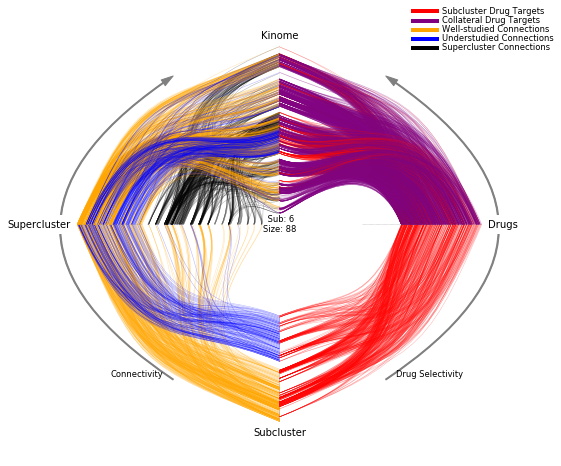

In [53]:
import matplotlib.lines as lines
import matplotlib.patches as patches
fig, ax = plt.subplots(ncols=1,nrows=1, figsize=(8,8))

h = plot_sub_super_hiveplot(sub_clust_no=6, super_clust_no=4, 
                            fig=fig, ax=ax, 
                            kinase_family_data = kinase_family_data, 
                            axis_pad=180)

kin_height = np.log(len(louv.names)+(len(louv.names)//25*8))*10

import matplotlib.collections  as mc
#bars = [[(0,plt.xlim()[1]-100), (0,plt.ylim())], [(0,plt.xlim()[0]+100), (0,plt.ylim())]]


lines = [[(plt.xlim()[1]-790, plt.ylim()[1]-40), (plt.xlim()[1]-550, plt.ylim()[1]-40)],
         [(plt.xlim()[1]-790, plt.ylim()[1]-200), (plt.xlim()[1]-550, plt.ylim()[1]-200)],
         [(plt.xlim()[1]-790, plt.ylim()[1]-280), (plt.xlim()[1]-550, plt.ylim()[1]-280)],
         [(plt.xlim()[1]-790, plt.ylim()[1]-360), (plt.xlim()[1]-550, plt.ylim()[1]-360)],
         [(plt.xlim()[1]-790, plt.ylim()[1]-120), (plt.xlim()[1]-550, plt.ylim()[1]-120)]]

c = np.array(['red',
              'orange',
              'blue',
              'black', 
              'purple'])


# connections
ax.text(x=plt.xlim()[1]-520, y=plt.ylim()[1]-200, s='Well-studied Connections', color='black', verticalalignment='center', fontsize='small')
ax.text(x=plt.xlim()[1]-520, y=plt.ylim()[1]-280, s='Understudied Connections', color='black', verticalalignment='center', fontsize='small')
ax.text(x=plt.xlim()[1]-520, y=plt.ylim()[1]-360, s='Supercluster Connections', color='black', verticalalignment='center', fontsize='small')

# drug targets
ax.text(x=plt.xlim()[1]-520, y=plt.ylim()[1]-40, s='Subcluster Drug Targets', color='black', verticalalignment='center', fontsize='small')
ax.text(x=plt.xlim()[1]-520, y=plt.ylim()[1]-120, s='Collateral Drug Targets', color='black', verticalalignment='center', fontsize='small')

lc = mc.LineCollection(lines, colors=c, linewidths=4)
#fig, ax = pl.subplots()
ax.add_collection(lc)

style="Simple,tail_width=1,head_width=7,head_length=12"
kw = dict(arrowstyle=style, color="gray")

arrow1 = patches.FancyArrowPatch((-900,plt.ylim()[0]+540), (-900,plt.ylim()[1]-600), connectionstyle="arc3,rad=-.75", **kw)
arrow2 = patches.FancyArrowPatch((900,plt.ylim()[0]+540), (900,plt.ylim()[1]-600), connectionstyle="arc3,rad=.75", **kw)

ax.text(x=0, y=plt.ylim()[1]- 250, s='Kinome', color='black', horizontalalignment='center', verticalalignment='center', fontsize='medium', bbox=dict(facecolor='white', edgecolor='white'))
ax.text(x=0, y=plt.ylim()[0]+ 80, s='Subcluster', color='black', horizontalalignment='center', verticalalignment='center', fontsize='medium', bbox=dict(facecolor='white',edgecolor='white'))
ax.text(x=plt.xlim()[0]-150, y=0, s='Supercluster', color='black', horizontalalignment='center', verticalalignment='center', fontsize='medium', bbox=dict(facecolor='white',edgecolor='white'))
ax.text(x=plt.xlim()[1], y=0, s='Drugs', color='black', horizontalalignment='center', verticalalignment='center', fontsize='medium', bbox=dict(facecolor='white',edgecolor='white'))

# arrow texts
ax.text(x=-1000, y=plt.ylim()[0]+600, s='Connectivity', color='black', horizontalalignment='right', verticalalignment='center', fontsize='small')
ax.text(x=1000, y=plt.ylim()[0]+600, s='Drug Selectivity', color='black', verticalalignment='center', fontsize='small')

ax.add_patch(arrow1)
ax.add_patch(arrow2)

print(plt.xlim())
print(plt.ylim())

ax.text(x=0,y=0, s=' Sub: 6\nSize: 88',color='black', horizontalalignment='center', verticalalignment='center', fontsize='small')
#h.draw()
plt.savefig('../viz/images/subc_8.pdf')

In [ ]:
super_sub_listing = louv.groupby('cluster_super')['cluster_sub'].agg(lambda x: set(x)).to_dict()
super_sub_listing

In [ ]:
line_count = 0
div_count = 7
for sup_ in super_sub_listing:
    line_count += 1 + len(super_sub_listing[sup_])//4
print(line_count)
print(div_count+line_count)

In [ ]:
sub_size_mapper = louv.groupby('cluster_sub').count()['names'].to_dict()
sub_size_mapper

In [ ]:
fig, axes = plt.subplots(ncols=4,nrows=21, figsize=(16,84))

#super_sub_picks = {1:[8,26,7],2:[4,9,10],4:[1,17,6]}

row_tracker = 0
column_tracker = 0

for sup_ in super_sub_listing.keys():
    print('Super: ', sup_)
    for sub_ in super_sub_listing[sup_]:
        print('Sub: ', sub_)
        if(column_tracker > 3 and column_tracker % 4 == 0):
            row_tracker +=1
        ax = axes[row_tracker][column_tracker%4]
        ax.clear()
        
        plot_sub_super_hiveplot(sub_clust_no=sub_, super_clust_no=sup_, fig=fig, ax=ax)
        ax.text(x=-90,y=-50, s='Sub '+str(sub_)+'\nN: '+str(sub_size_mapper[sub_]),color='black',fontsize='xx-small')
        
        column_tracker+=1
        
    while(column_tracker % 4 != 0):
        print('Blanking: ', row_tracker, column_tracker)
        axes[row_tracker][column_tracker%4].axis('off')
        column_tracker += 1
    
    column_tracker = 0        
    
    # blank the next row
    for i in range(4):
        axes[row_tracker+1][i].axis('off')
    
    #skip the blank row
    row_tracker += 2
        

#h.draw()
plt.savefig('../viz/images/supercluster_hive_panel.pdf')